In [2]:
"""
Great Content About Shap - Theory 
https://en.wikipedia.org/wiki/Shapley_value 
https://www.youtube.com/playlist?list=PLqDyyww9y-1SJgMw92x90qPYpHgahDLIK -> "Borrowed" the hackathon idea from him :) 
"""

### SHAP Documentations https://shap.readthedocs.io/en/latest/
#!pip install shap

'\nGreat Content About Shap - Theory \nhttps://en.wikipedia.org/wiki/Shapley_value \nhttps://www.youtube.com/playlist?list=PLqDyyww9y-1SJgMw92x90qPYpHgahDLIK -> "Borrowed" the hackathon idea from him :) \n'

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import shap
shap.initjs()

# Load the California housing dataset from sklearn 
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing(as_frame=True)

# Extract the feature matrix (X) and target vector (y)
X = housing_data.data
y = housing_data.target

# Combine into a single dataframe for easier viewing
data = pd.concat([X, y], axis=1)

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Features:
 1. MedInc: Median income in block group
 2. HouseAge: Median house age in block group
 3. AveRooms: Average number of rooms
 4. AveBedrms: Average number of bedrooms
 5. Population: Population in block group
 6. AveOccup: Average number of household members
 7. Latitude: Latitude of the block group
 8. Longitude: Longitude of the block group
# Target
 - MedHouseVal: Target variable, natural log of the median home price.

In [4]:
X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [5]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], " \t=", model.coef_[i].round(5))

Model coefficients:

MedInc  	= 0.43669
HouseAge  	= 0.00944
AveRooms  	= -0.10732
AveBedrms  	= 0.64507
Population  	= -0.0
AveOccup  	= -0.00379
Latitude  	= -0.42131
Longitude  	= -0.43451


In [6]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

ExactExplainer explainer: 20641it [01:08, 265.41it/s]                           


In [7]:
# make a standard partial dependence plot
sample_ind = 20

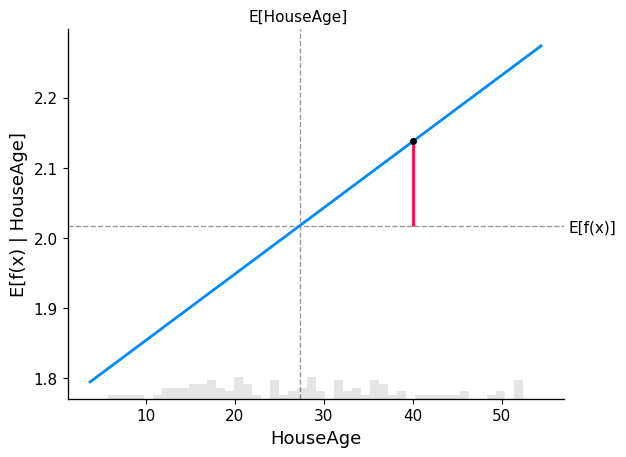

In [8]:
shap.partial_dependence_plot(
    "HouseAge",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

## Waterfall and Force Plots

E[f(x)] = 2.018 gives the average predicted number of rings across all houses. f(x) = 1.428 is the predicted log of house price for this particular house. The SHAP values are all the values in between. For example, the MedInc weight has decreased the predicted MedHouseVal by 1.04

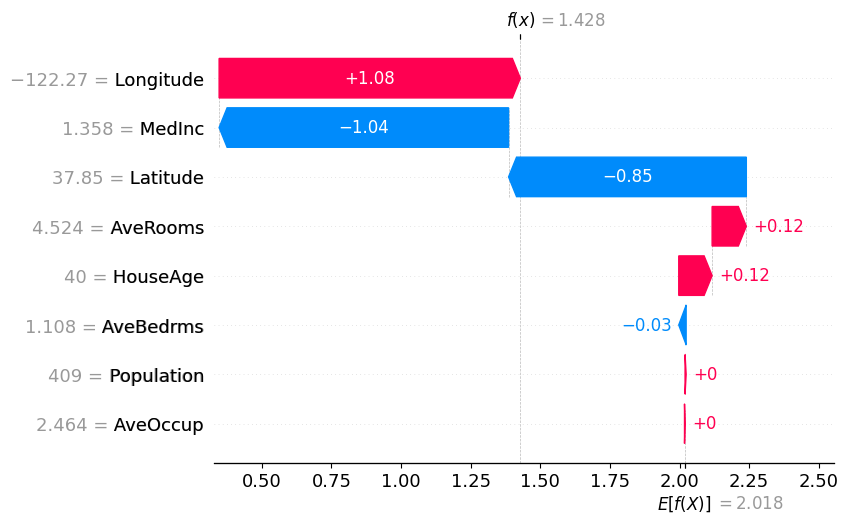

In [9]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [10]:
# Forceplot for first observation
shap.plots.force(shap_values[sample_ind])

In [11]:
shap.plots.force(shap_values[0:100])

For example, in the plot above if we:
- Only displayed the SHAP values for Houe Age (y-axis = HouseAge effects)
- Ordered the force plots by the House Age feature values (x-axis = HouseAge)

From this plot, we can see that as House Age increases the SHAP values also increase. In other words, the older houses in the block tend to have higher house value for that block

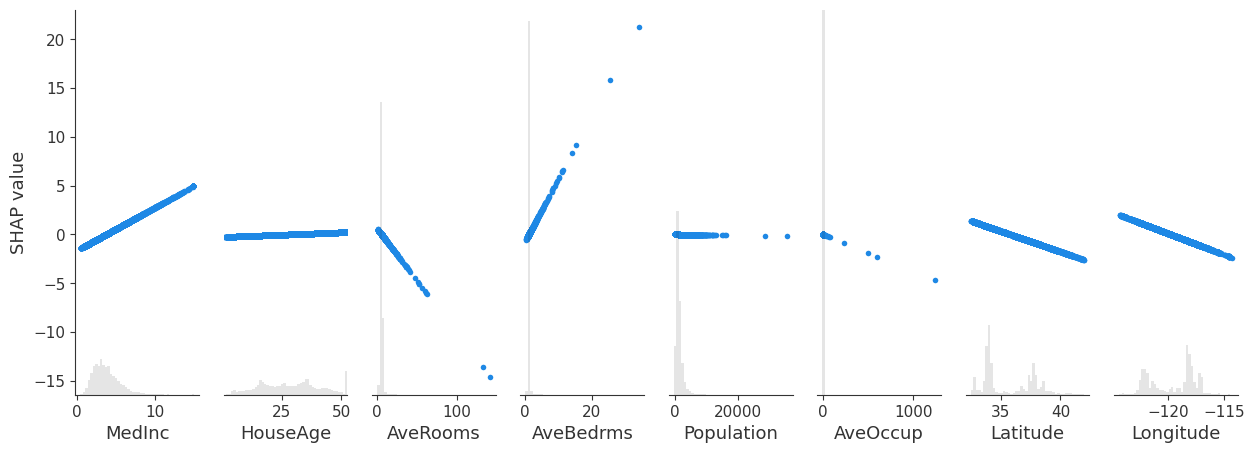

In [12]:
shap.plots.scatter(shap_values, ylabel="SHAP value")

## Mean SHAP Plot
Mean shap plot will tell us which features are most important. For each feature, we calculate the mean SHAP value across all observations. Specifically, we take the mean of the absolute values as we do not want positive and negative values to offset each other. In the end, we have the bar plot below. There is one bar for each feature. For example, we can see that Lat and Long values had the largest mean SHAP value.

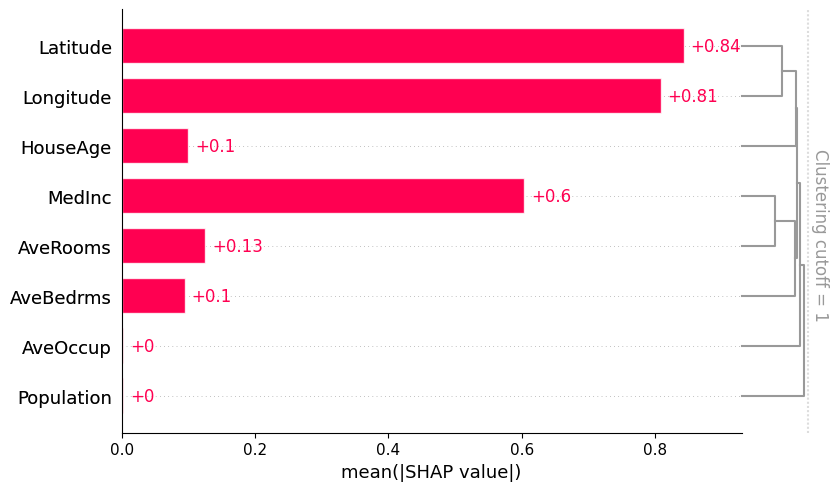

In [13]:
clust = shap.utils.hclust(X, y, linkage="single")
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=1)

In [14]:
# Train a RandomForest model
model_rf = RandomForestRegressor(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf.fit(X_test, y_test)

RandomForestRegressor()

Feature       | Explainer	                                                            | TreeExplainer
Model Support |	Works for any model (model-agnostic)                                    | Specific to tree-based models
SHAP Method	  | Uses various SHAP methods (e.g., Kernel SHAP) based on the model type	| Tree-specific fast SHAP algorithm
Performance   | Slower for complex models (e.g., neural networks)                       | Fast and efficient for tree-based models
Accuracy      | Approximate for non-tree models                                         | Exact for tree-based models

In [35]:
explainer_rf_normal = shap.Explainer(model_rf.predict,X100)
shap_values_rf_normal = explainer_rf_normal(X)

ExactExplainer explainer: 20641it [5:04:49,  1.12it/s]                                


In [29]:
explainer_rf = shap.TreeExplainer(model_rf)
shap_values_rf = explainer_rf.shap_values(X,check_additivity=False)

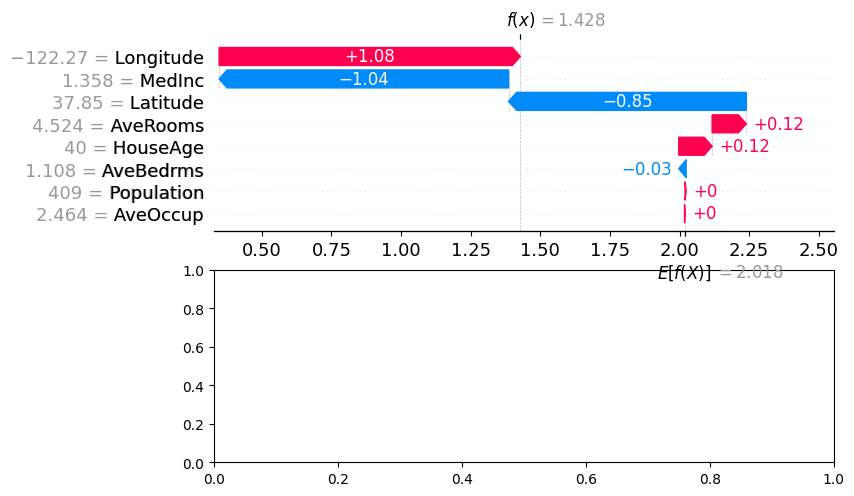

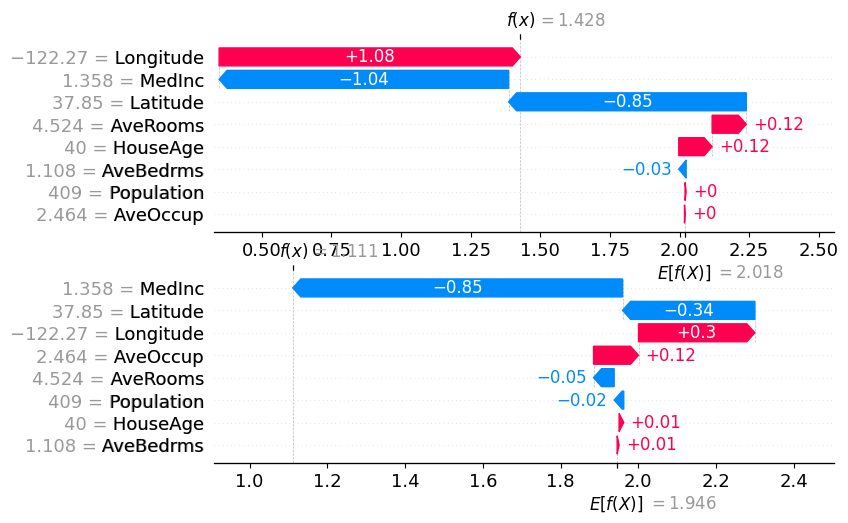

<Figure size 640x480 with 0 Axes>

In [41]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

plt.sca(axes[0])
fig = shap.plots.waterfall(shap_values[sample_ind], max_display=14)

plt.sca(axes[1])
fig1 =shap.plots.waterfall(shap_values_rf_normal[sample_ind], max_display=14)

plt.tight_layout()
# plt.show()

In [44]:
shap.plots.force(shap_values[sample_ind])


In [46]:
shap.plots.force(shap_values_rf_normal[sample_ind])


In [ ]:
shap.plots.force(shap_values_rf[0:100])